#**Линейные модели, SVM и деревья решений**

**Цель лабораторной работы**\
Изучение линейных моделей, SVM и деревьев решений.

**Задание**
1.  Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2.  В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3.  С использованием метода train_test_split разделите выборку на обучающую и тестовую.

  Обучите следующие модели:
  -  одну из линейных моделей;
  -  SVM;
  -  дерево решений.
4.  Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.

##**Решение**

###**Импорт библиотек и загрузка данных**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import Image
from io import StringIO 
from typing import Tuple, Dict
from operator import itemgetter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree , export_graphviz
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
# загрузка данных
uploaded = files.upload()

Saving pulsar_stars.csv to pulsar_stars.csv


In [2]:
data = pd.read_csv('GlobalTem.csv', sep=',')

###**Характеристики датасета**

В лабораторной работе используется датасет Pulsar Stars. Датасет содержит характеристики звезды и ее принадлежность к пульсарам или нет.\
**В датасете представлены следующие признаки:**
-  Mean of the integrated profile - среднее значение интегрированного профиля
-  Standard deviation of the integrated profile - стандартное отклонение интегрированного профиля
-  Excess kurtosis of the integrated profile - чрезмерный эксцесс интегрированного профиля
-  Skewness of the integrated profile - перекос интегрированного профиля
-  Mean of the DM-SNR curve - среднее значение кривой DM-SNR
-  Standard deviation of the DM-SNR curve - стандартное отклонение кривой DM-SNR
-  Excess kurtosis of the DM-SNR curve - избыточный эксцесс кривой DM-SNR
-  Skewness of the DM-SNR curve - асимметрия кривой DM-SNR
-  target_class - 0 (не является пульсаром), 1 (является пульсаром)

In [3]:
# размер датасета
data.shape

(20000, 17)

In [4]:
# типы колонок
data.dtypes

letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object

In [5]:
# первые 5 строк
data.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
# статистические характеристики признаков
data.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
# Количество пропусков в данных
data.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
# Количество уникальных значений для каждого признака
data.nunique()

letter    26
xbox      16
ybox      16
width     16
height    16
onpix     16
xbar      16
ybar      16
x2bar     16
y2bar     16
xybar     16
x2ybar    16
xy2bar    16
xedge     16
xedgey    16
yedge     16
yedgex    16
dtype: int64

###**Разделение выборки на обучающую и тестовую**

In [84]:
# разделим данные на целевой столбец и признаки
X = data.drop(['width', 'letter'], axis = 1)
Y = data['width']

In [15]:
# с использованием метода train_test_split разделим выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

        xbox  ybox  height  onpix  xbar  ...  xy2bar  xedge  xedgey  yedge  yedgex
18960     2     5       4      3     9  ...       7      4       7      5       9
11353     5     6       4      4     2  ...       8      5      11      1       7
7449      2     4       3      1     7  ...       8      1      11      1       7
14308     1     0       0      0     4  ...      11      2       8      2      10
11889     9    13       7      4     7  ...       9      6      11      3       7

[5 rows x 15 columns] 

Входные параметры тестовой выборки:

        xbox  ybox  height  onpix  xbar  ...  xy2bar  xedge  xedgey  yedge  yedgex
11456     4     6       4      3     5  ...       6      2       8      3       8
16528     2     3       2      2     7  ...       5      2       8      2       7
3253      3     4       3      1     4  ...       7      2      11      1       8
18614     3     7       5      4     6  ...       7      2       9      7     

###**Линейная модель**

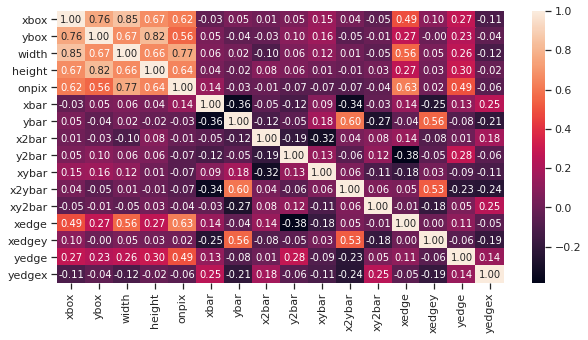

In [85]:
# построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

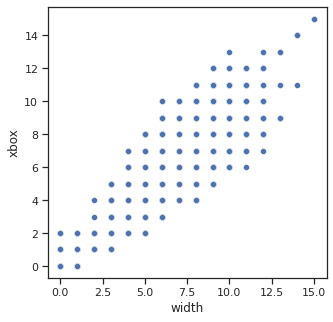

In [92]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='width', y='xbox', data=data)

In [93]:
# Аналитическое вычисление коэффициентов регрессии
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-x_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [94]:
x_array = data['width'].values
y_array = data['xbox'].values

In [95]:
b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(-0.11834008328079193, 0.8086707114188803)

In [96]:
# Вычисление значений y на основе x для регрессии
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [97]:
y_array_regr = y_regr(x_array, b0, b1)

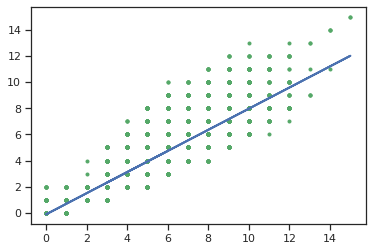

In [98]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
plt.show()

In [47]:
# Простейшая реализация градиентного спуска
def gradient_descent(x_array : np.ndarray,
                     y_array : np.ndarray,
                     b0_0 : float,
                     b1_0 : float,
                     epochs : int,
                     learning_rate : float = 0.001
                    ) -> Tuple[float, float]:
    # Значения для коэффициентов по умолчанию
    b0, b1 = b0_0, b1_0
    k = float(len(x_array))
    for i in range(epochs): 
        # Вычисление новых предсказанных значений
        # используется векторизованное умножение и сложение для вектора и константы
        y_pred = b1 * x_array + b0
        # Расчет градиентов
        # np.multiply - поэлементное умножение векторов
        dL_db1 = (-2/k) * np.sum(np.multiply(x_array, (y_array - y_pred)))
        dL_db0 = (-2/k) * np.sum(y_array - y_pred)
        # Изменение значений коэффициентов:
        b1 = b1 - learning_rate * dL_db1
        b0 = b0 - learning_rate * dL_db0
    # Результирующие значения
    y_pred = b1 * x_array + b0
    return b0, b1, y_pred

In [48]:
def show_gradient_descent(epochs, b0_0, b1_0):
    grad_b0, grad_b1, grad_y_pred = gradient_descent(x_array, y_array, b0_0, b1_0, epochs)
    print('b0 = {} - (теоретический), {} - (градиентный спуск)'.format(b0, grad_b0))
    print('b1 = {} - (теоретический), {} - (градиентный спуск)'.format(b1, grad_b1))
    print('MSE = {}'.format(mean_squared_error(y_array_regr, grad_y_pred)))
    plt.plot(x_array, y_array, 'g.')
    plt.plot(x_array, y_array_regr, 'b', linewidth=2.0)
    plt.plot(x_array, grad_y_pred, 'r', linewidth=2.0)
    plt.show()

b0 = -0.11834008328079193 - (теоретический), 0.06111974179271705 - (градиентный спуск)
b1 = 0.8086707114188803 - (теоретический), 0.36383722800555685 - (градиентный спуск)
MSE = 5.208469546034996


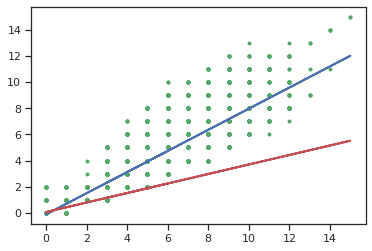

In [49]:
# Примеры использования градиентного спуска
show_gradient_descent(10, 0, 0)

b0 = -0.11834008328079193 - (теоретический), 0.07316842040799902 - (градиентный спуск)
b1 = 0.8086707114188803 - (теоретический), 0.7761497628789418 - (градиентный спуск)
MSE = 0.004914167528461014


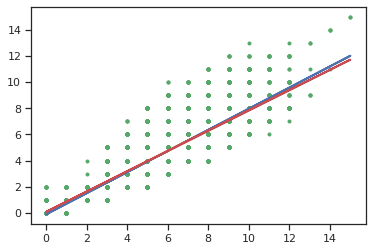

In [50]:
show_gradient_descent(1000, 0, 0)

b0 = -0.11834008328079193 - (теоретический), -0.09997595232764354 - (градиентный спуск)
b1 = 0.8086707114188803 - (теоретический), 0.8055522130430663 - (градиентный спуск)
MSE = 4.518711286592616e-05


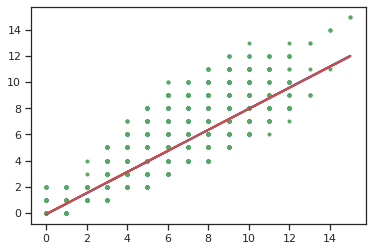

In [51]:
show_gradient_descent(10000, 0, 0)

b0 = -0.11834008328079193 - (теоретический), -2.2967059048977685 - (градиентный спуск)
b1 = 0.8086707114188803 - (теоретический), 3.2130337566890645 - (градиентный спуск)
MSE = 126.20792311531724


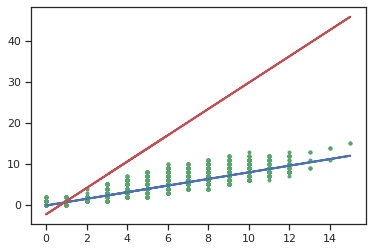

In [52]:
show_gradient_descent(10, -2, 5)

In [53]:
# Обучим линейную регрессию и сравним коэффициенты с рассчитанными ранее
reg1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, reg1.coef_), (b0, reg1.intercept_)

((0.8086707114188803, array([[0.80867071]])),
 (-0.11834008328079193, array([-0.11834008])))

###**SVM**

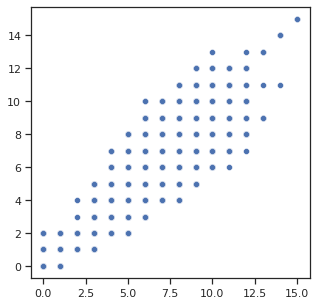

In [54]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=x_array, y=y_array)

In [55]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(x_array.reshape(-1, 1), y_array)
    y_pred = clf.predict(x_array.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(x_array, y_array, 'b.')
    ax.plot(x_array, y_pred, 'ro')
    plt.show()

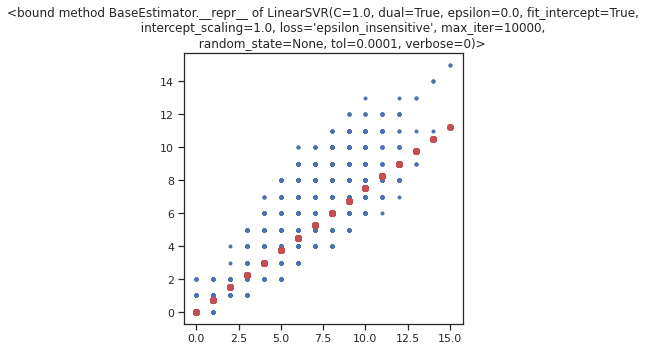

In [56]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

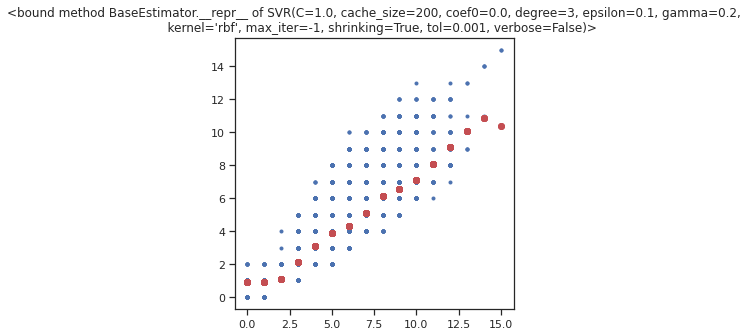

In [64]:
plot_regr(SVR(gamma=0.2, C=1.0))

###**Дерево решений**

In [99]:
# Обучим дерево на всех признаках
tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [100]:
# Важность признаков
list(zip(X_train.columns.values, tree.feature_importances_))

[('xbox', 0.7590632983338205),
 ('ybox', 0.008120554385437245),
 ('height', 0.011457124814174375),
 ('onpix', 0.09034859242035889),
 ('xbar', 0.009826827298346543),
 ('ybar', 0.00639176136815112),
 ('x2bar', 0.02882453674866567),
 ('y2bar', 0.013351134043562153),
 ('xybar', 0.007931254908600558),
 ('x2ybar', 0.007557564775213297),
 ('xy2bar', 0.008202635866664415),
 ('xedge', 0.017103866004458516),
 ('xedgey', 0.007047375311687091),
 ('yedge', 0.01963098047882765),
 ('yedgex', 0.005142493242031915)]

In [101]:
sum(tree.feature_importances_)

0.9999999999999998

In [102]:
def draw_feature_importances(tree_model, X_dataset, figsize=(10,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

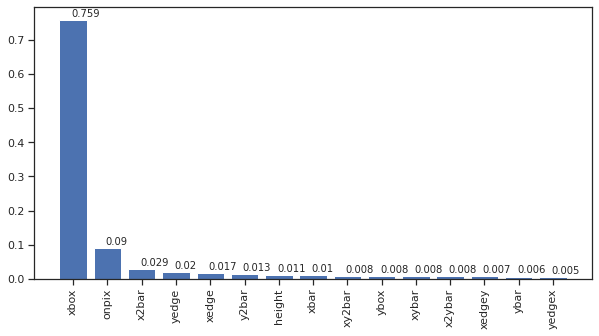

In [103]:
tree_fl, tree_fd = draw_feature_importances(tree, X_train)

In [104]:
# Список признаков, отсортированный на основе важности, и значения важности
tree_fl, tree_fd

(['xbox',
  'onpix',
  'x2bar',
  'yedge',
  'xedge',
  'y2bar',
  'height',
  'xbar',
  'xy2bar',
  'ybox',
  'xybar',
  'x2ybar',
  'xedgey',
  'ybar',
  'yedgex'],
 [0.7590632983338205,
  0.09034859242035889,
  0.02882453674866567,
  0.01963098047882765,
  0.017103866004458516,
  0.013351134043562153,
  0.011457124814174375,
  0.009826827298346543,
  0.008202635866664415,
  0.008120554385437245,
  0.007931254908600558,
  0.007557564775213297,
  0.007047375311687091,
  0.00639176136815112,
  0.005142493242031915])

In [105]:
X_train.head()

,xbox,ybox,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
18960,2,5,4,3,9,7,2,6,11,5,7,4,7,5,9
11353,5,6,4,4,2,11,2,3,10,10,8,5,11,1,7
7449,2,4,3,1,7,11,2,6,7,11,8,1,11,1,7
14308,1,0,0,0,4,6,5,2,7,6,11,2,8,2,10
11889,9,13,7,4,7,7,3,7,9,9,9,6,11,3,7


In [106]:
# Пересортируем признаки на основе важности
X_train_sorted = X_train[tree_fl]
X_train_sorted.head()

,xbox,onpix,x2bar,yedge,xedge,y2bar,height,xbar,xy2bar,ybox,xybar,x2ybar,xedgey,ybar,yedgex
18960,2,3,2,5,4,6,4,9,7,5,11,5,7,7,9
11353,5,4,2,1,5,3,4,2,8,6,10,10,11,11,7
7449,2,1,2,1,1,6,3,7,8,4,7,11,11,11,7
14308,1,0,5,2,2,2,0,4,11,0,7,6,8,6,10
11889,9,4,3,3,6,7,7,7,9,13,9,9,11,7,7


In [107]:
Y_test_predict = tree.predict(X_test)

In [108]:
mean_absolute_error(Y_test, Y_test_predict)

0.36427333333333334

In [109]:
# Исследуем, как изменяется ошибка при добавлении признаков в порядке значимости
X_range = list(range(1, len(X_train.columns)+1))
X_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [110]:
mae_list = []
for i in X_range:
    # Обучим дерево и предскажем результаты на заданном количестве признаков 
    tree_3 = DecisionTreeRegressor(random_state=1).fit(X_train[tree_fl[0:i]], Y_train)
    Y_test_predict_3 = tree_3.predict(X_test[tree_fl[0:i]])
    temp_mae = mean_absolute_error(Y_test, Y_test_predict_3)
    mae_list.append(temp_mae)

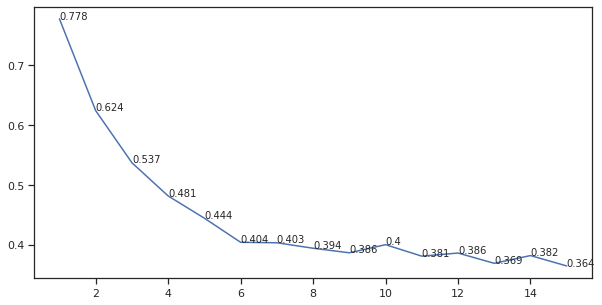

In [111]:
plt.subplots(figsize=(10,5))
plt.plot(X_range, mae_list)
for a,b in zip(X_range, mae_list):
    plt.text(a, b, str(round(b,3)))
plt.show()

###**Оценка качества моделей**

**Линейная модель**

In [65]:
pred = reg1.predict(x_array.reshape(-1, 1))
print("r2_score:", r2_score(y_array, pred))
print("mean_squared_error", mean_squared_error(y_array, pred))

r2_score: 0.7250760853965874
mean_squared_error 1.0062752468940939


**SCV**

In [66]:
svr = SVR(kernel='rbf')
svr.fit(X_train, Y_train)
print("r2_score:", r2_score(Y_test, svr.predict(X_test)))
print("mean_squared_error", mean_squared_error(Y_test, svr.predict(X_test)))

r2_score: 0.9360922605036351
mean_squared_error 0.25658292767299734


**Дерево решений**

In [67]:
print("r2_score:", r2_score(Y_test, tree.predict(X_test)))
print("mean_squared_error:", mean_squared_error(Y_test, tree.predict(X_test)))

r2_score: 0.8941208771866901
mean_squared_error: 0.42509366666666665


Коэффициент детерминации для всех трех моделей больше 50%, поэтому можно считать, что все три модели являются приемлемыми.